# About data set : 
   The weather forecast machine learning dataset contains historical weather data such as temperature, humidity, wind speed, and atmospheric pressure, enabling the training and evaluation of predictive models for accurate weather forecasting. It's a valuable resource for developing algorithms that enhance our understanding of meteorological patterns and improve the precision of weather predictions.
This dataset is reffered from www.kaggel.com.

## Problem Statement :
  * The problem statement of weather forecasting involves developing predictive models that can accurately predict future weather conditions
  *  The goal is to minimize errors and improve the reliability of short-term and long-term weather predictions

## Import the necessary libraries.

In [1]:
import numpy as np # for Reding and analyze data
import pandas as pd # for Mathematical operations

In [2]:
import matplotlib.pyplot as plt #data visualization

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

## Read dataset

In [4]:
w_df=pd.read_csv('dataset.csv',parse_dates=['date_time'],index_col='date_time')
w_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


### Size of Dataset

In [5]:
# Shape of data set
w_df.shape

(96432, 24)

#### Number of columns 96432 and rows 24 in dataset

### Taking small amount of data from large dataset

In [6]:
w_df=w_df.iloc[94333:96433,:]

 In above we are taking only 2000 columns from the dataset  for weather forecasting.

## Insights of dataset

In [7]:
w_df.shape

(2099, 24)

#### After slice there are 2099 columns and 24 row data

### To view Top datavalues of dataset 

In [8]:
w_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2019-10-06 13:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,33,11,6,45,0.0,1008,33,10,281,9
2019-10-06 14:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,33,12,7,46,0.0,1008,33,10,282,9
2019-10-06 15:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,32,13,9,46,0.0,1007,32,10,283,10
2019-10-06 16:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,31,14,11,49,0.0,1007,31,10,282,9
2019-10-06 17:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,30,14,13,53,0.0,1007,30,10,280,9


### To view bottom datavalues of dataset 

In [9]:
w_df.tail()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 19:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,13,21,53,61,0.0,1019,13,8,74,11
2020-01-01 20:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,22,39,61,0.0,1020,13,9,81,11
2020-01-01 21:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,23,25,62,0.0,1020,13,10,88,11
2020-01-01 22:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,21,26,63,0.0,1020,13,10,85,11
2020-01-01 23:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,20,27,64,0.0,1020,12,10,83,10


### Detail information of Dataset


In [10]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2099 entries, 2019-10-06 13:00:00 to 2020-01-01 23:00:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           2099 non-null   int64  
 1   mintempC           2099 non-null   int64  
 2   totalSnow_cm       2099 non-null   float64
 3   sunHour            2099 non-null   float64
 4   uvIndex            2099 non-null   int64  
 5   uvIndex.1          2099 non-null   int64  
 6   moon_illumination  2099 non-null   int64  
 7   moonrise           2099 non-null   object 
 8   moonset            2099 non-null   object 
 9   sunrise            2099 non-null   object 
 10  sunset             2099 non-null   object 
 11  DewPointC          2099 non-null   int64  
 12  FeelsLikeC         2099 non-null   int64  
 13  HeatIndexC         2099 non-null   int64  
 14  WindChillC         2099 non-null   int64  
 15  WindGustKmph       2099 non-null   i

* There are total 24 columns.
 * In that 16 are integer columns, 3 are flotting value columns and 4 are categorical columns.
 

## Pre-Processing of the data

### 1. Missing Data Treatment

In [11]:
w_df.isna().sum()

maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

There are no null values in the dataset

## The obj for object (categorical) columns and num for numeric columns

In [12]:
obj = []
num = []
for i in w_df.columns:
    if(w_df[i].dtypes =='object'):
        obj.append(i)
    else:
        num.append(i)
    

In [13]:
obj

['moonrise', 'moonset', 'sunrise', 'sunset']

In [14]:
num

['maxtempC',
 'mintempC',
 'totalSnow_cm',
 'sunHour',
 'uvIndex',
 'uvIndex.1',
 'moon_illumination',
 'DewPointC',
 'FeelsLikeC',
 'HeatIndexC',
 'WindChillC',
 'WindGustKmph',
 'cloudcover',
 'humidity',
 'precipMM',
 'pressure',
 'tempC',
 'visibility',
 'winddirDegree',
 'windspeedKmph']

### 2. Detail descripition of dataset

In [15]:
w_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,2099.000000,2099.000000,2099.0,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,28.626012,20.116722,0.0,8.541067,6.399238,3.982373,46.159123,11.217723,24.359695,24.522153,23.914721,10.243926,13.079085,46.121963,0.009147,1013.302525,23.930919,9.963316,223.844688,7.151501
std,4.605579,4.679550,0.0,0.623660,1.036383,2.873430,31.484640,5.187132,5.501340,5.361824,5.294823,5.195469,19.422537,11.823632,0.098474,3.185173,5.257841,0.332664,96.213992,3.395718
min,15.000000,8.000000,0.0,4.000000,4.000000,1.000000,0.000000,-4.000000,7.000000,8.000000,7.000000,1.000000,0.000000,22.000000,0.000000,1006.000000,8.000000,5.000000,5.000000,1.000000
25%,25.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,20.000000,21.000000,20.000000,6.500000,1.000000,38.000000,0.000000,1011.000000,20.000000,10.000000,130.000000,5.000000
50%,30.000000,21.000000,0.0,8.700000,7.000000,5.000000,46.000000,12.000000,26.000000,26.000000,25.000000,9.000000,6.000000,45.000000,0.000000,1013.000000,25.000000,10.000000,271.000000,7.000000
75%,32.000000,24.000000,0.0,8.700000,7.000000,7.000000,72.000000,15.000000,28.000000,28.000000,28.000000,13.000000,15.000000,52.000000,0.000000,1016.000000,28.000000,10.000000,300.000000,9.000000
max,35.000000,27.000000,0.0,8.700000,8.000000,8.000000,100.000000,21.000000,36.000000,36.000000,34.000000,39.000000,100.000000,93.000000,2.200000,1021.000000,34.000000,10.000000,360.000000,26.000000


* The w_df.describe() function is likely used to generate a statistical summary of the DataFrame 
*  This summary includes various descriptive statistics for the numeric columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and percentiles. 

### Checking is there any null values in the dataset

In [16]:
w_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

There are no null values in the dataset

###  separate the feature (i.e. temperature) to be predicted from the rest of the featured. w_x stores the rest of the dataset while w_y has temperature column.

In [17]:
w_df_num=w_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
w_df_num.head(5)

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-10-06 13:00:00,34,27,6,45,33,8.7,35,0.0,1008,9
2019-10-06 14:00:00,34,27,7,46,33,8.7,35,0.0,1008,9
2019-10-06 15:00:00,34,27,9,46,32,8.7,35,0.0,1007,10
2019-10-06 16:00:00,34,27,11,49,31,8.7,34,0.0,1007,9
2019-10-06 17:00:00,34,27,13,53,30,8.7,33,0.0,1007,9


In [18]:
w_df_num.tail(5)

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2020-01-01 19:00:00,15,11,53,61,13,7.1,13,0.0,1019,11
2020-01-01 20:00:00,15,11,39,61,13,7.1,13,0.0,1020,11
2020-01-01 21:00:00,15,11,25,62,13,7.1,13,0.0,1020,11
2020-01-01 22:00:00,15,11,26,63,13,7.1,13,0.0,1020,11
2020-01-01 23:00:00,15,11,27,64,12,7.1,12,0.0,1020,10


#### Now we have consider the required numbers of coloums from the datas

# 

### shape and columns of new Dataframe Dataset

In [19]:
w_df_num.shape

(2099, 10)

In [20]:
w_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

 There are 2099 rows and 10 colums

# 

## Plotting all columns values of Dataset

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

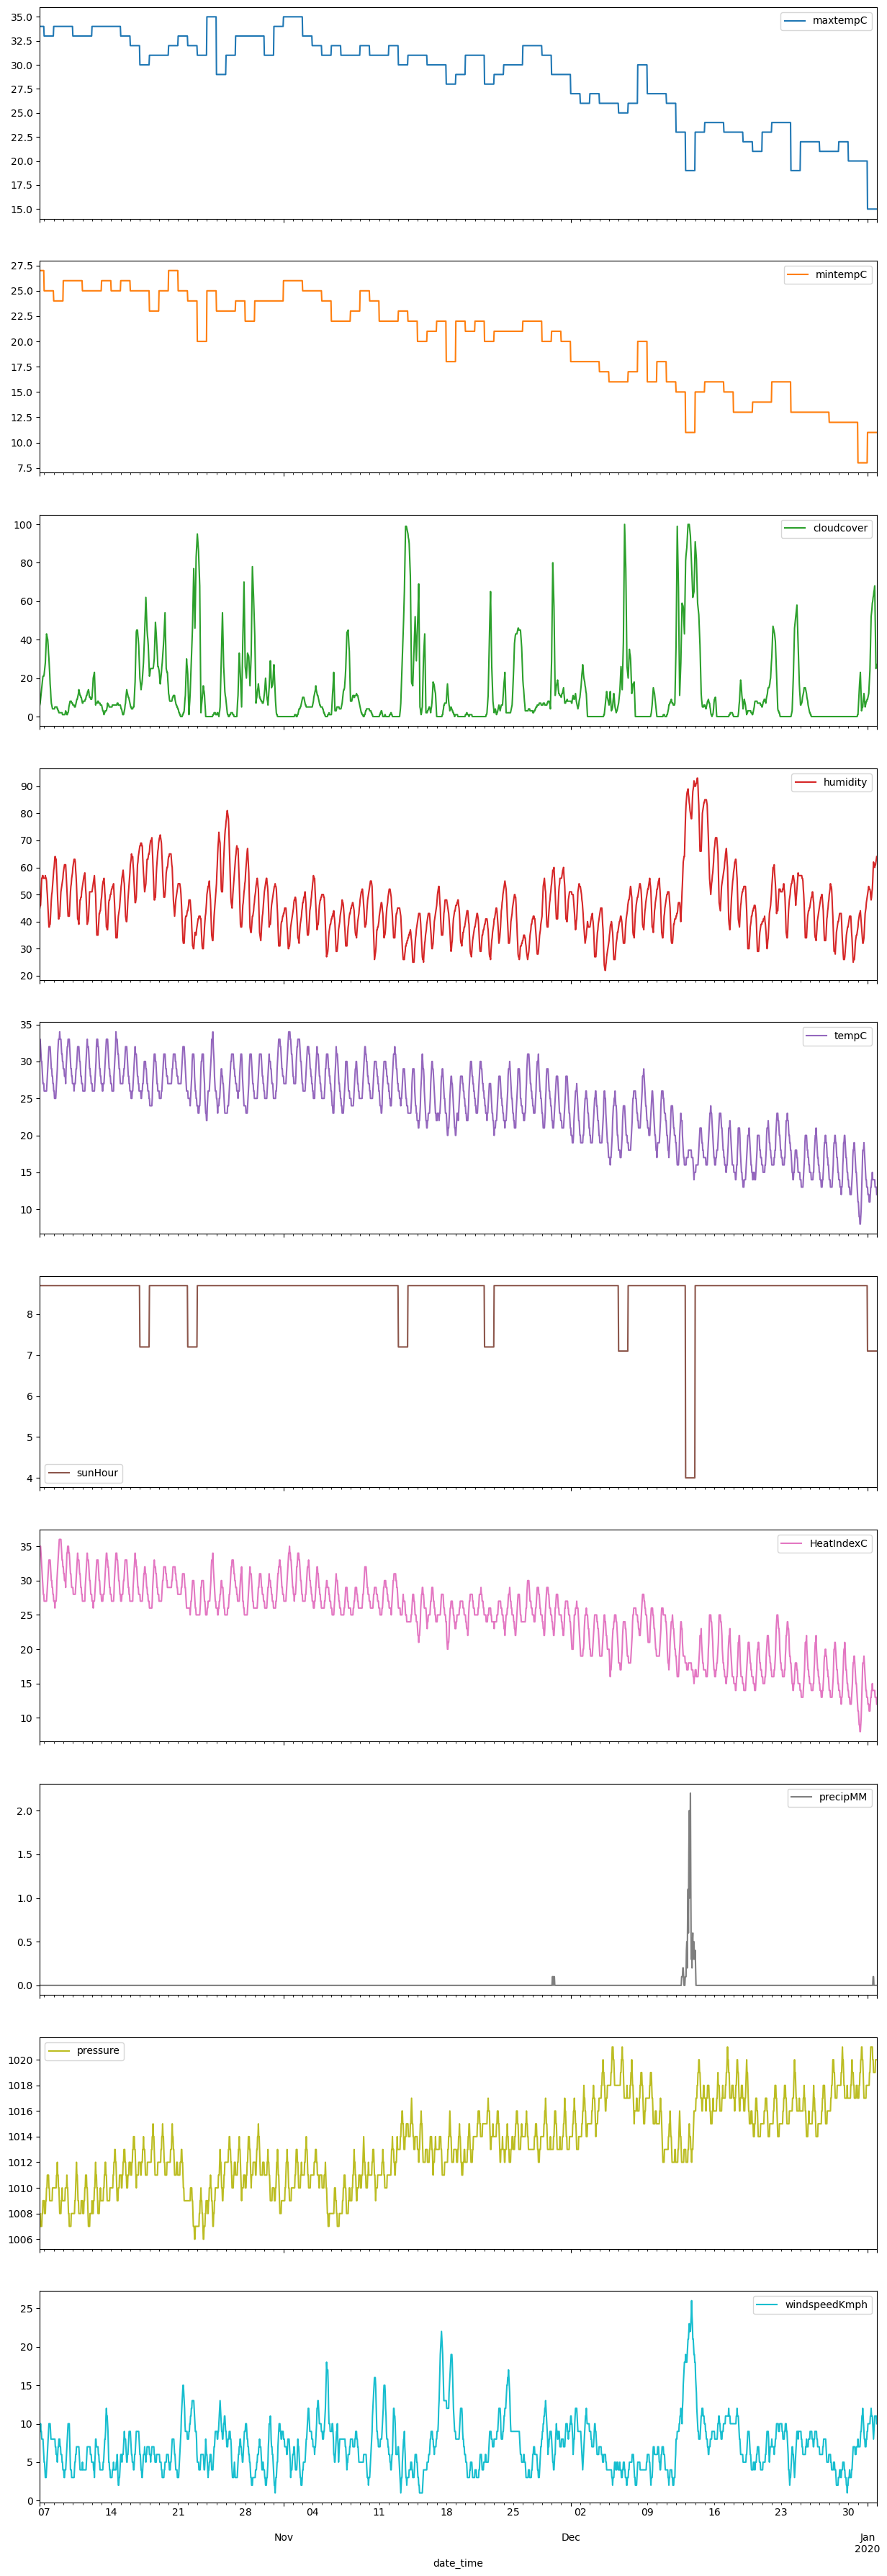

In [21]:
w_df_num.plot(subplots=True, figsize=(15,45))

#### It shows the graph for each an individual columns for the complete dataset

# 

# Ploting the column values for 1 year


array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

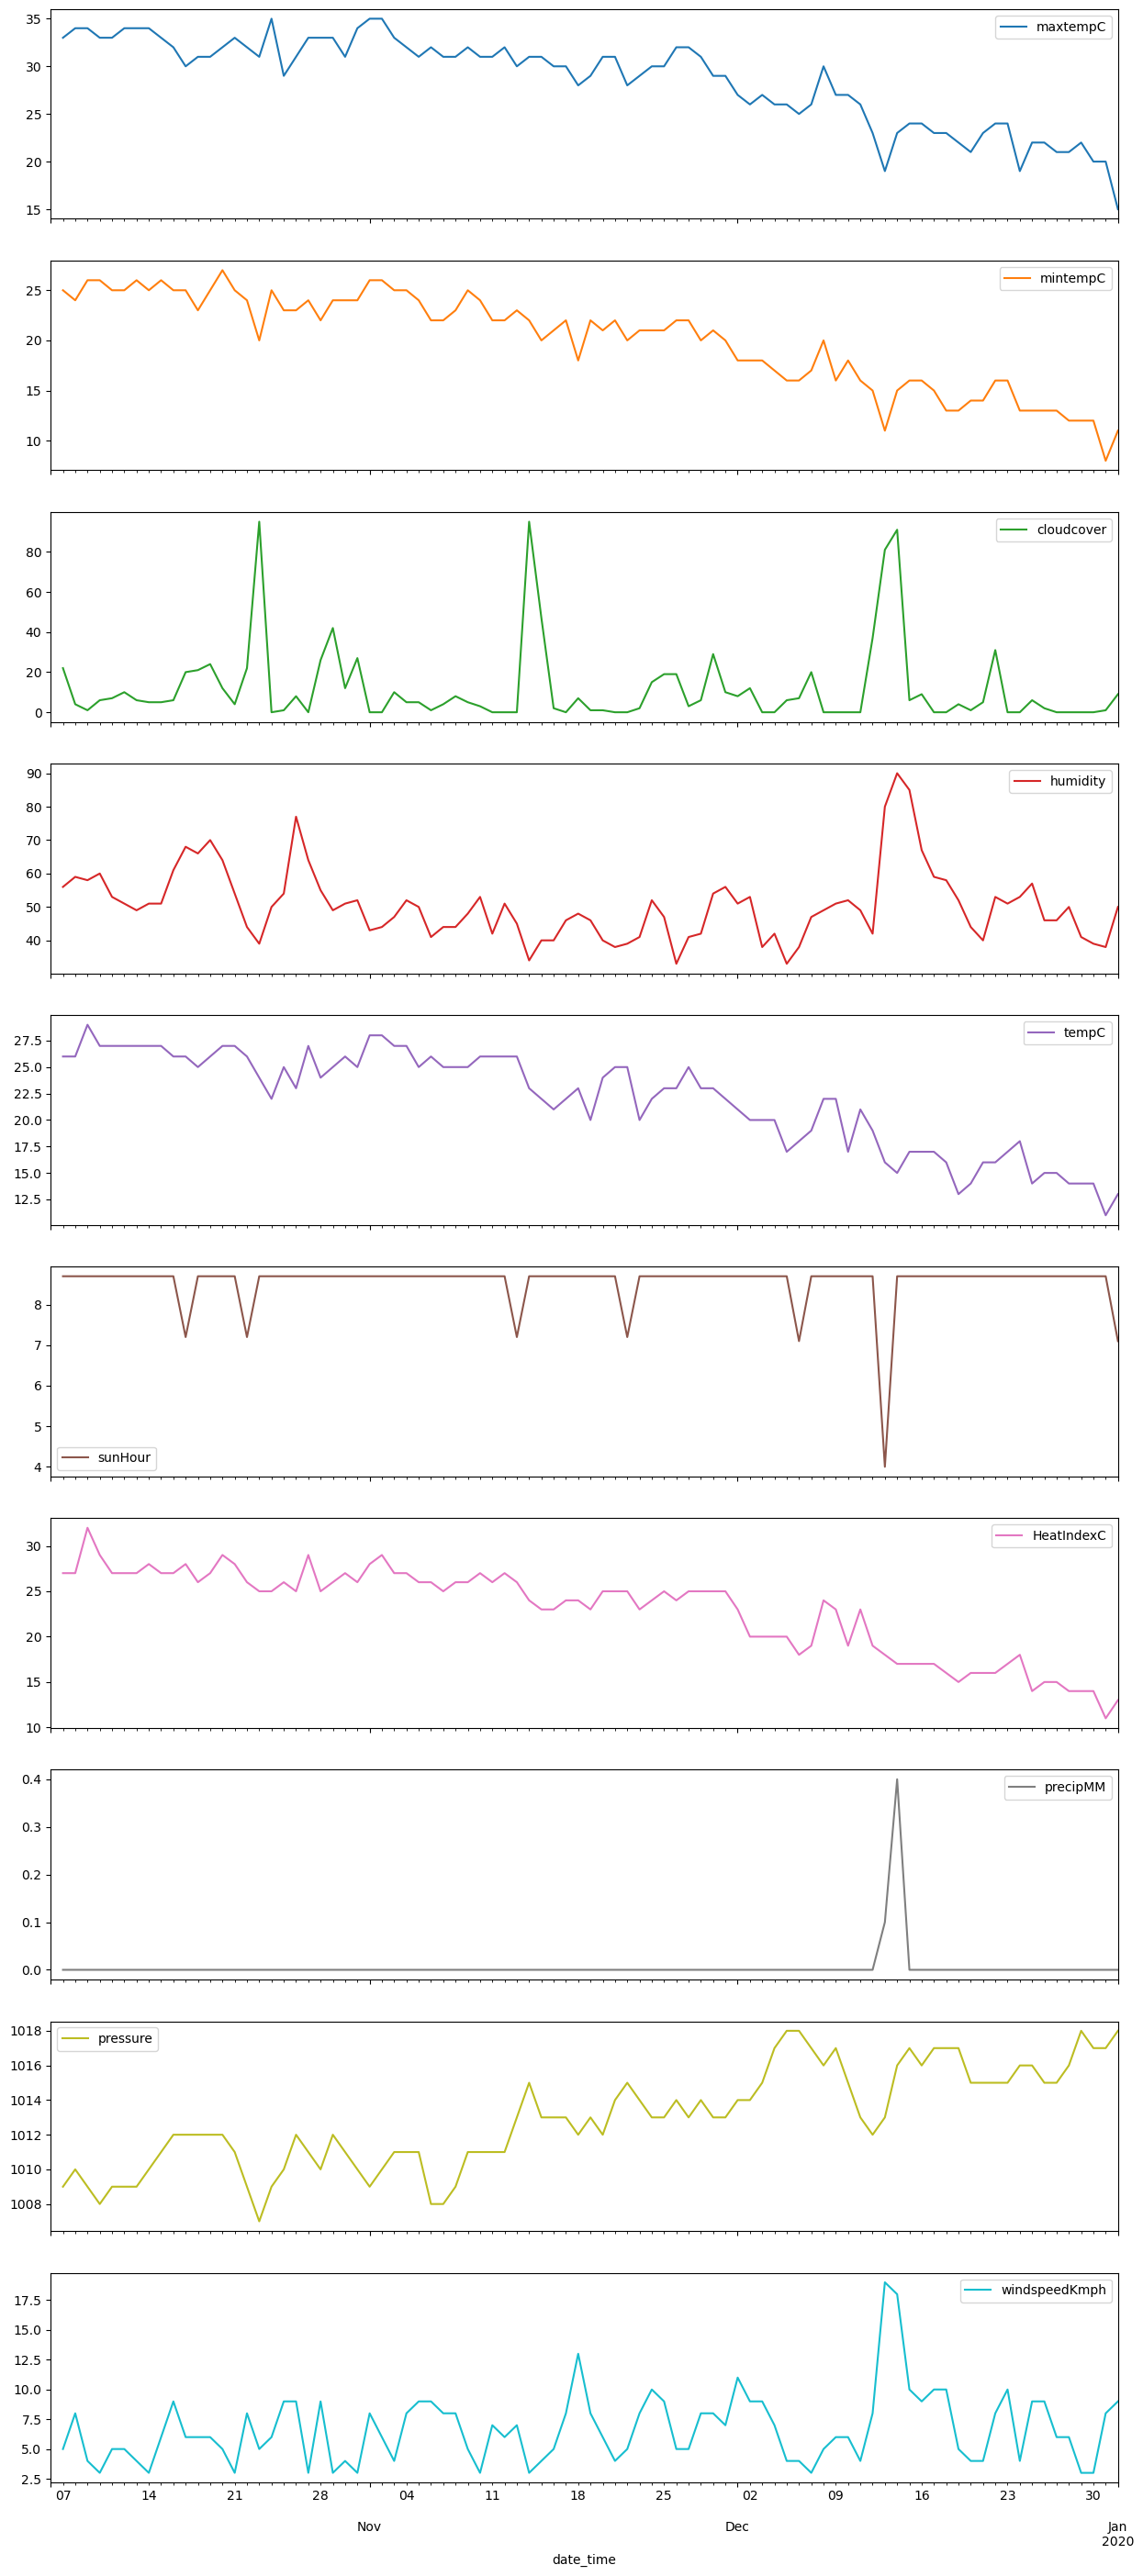

In [22]:
w_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(15,35))

#### It shows the graph for each an individual columns for a year

# 

## Plotting histograms for the numeric columns

#### This type of visualization can help you understand the distribution of data within each numeric column, allowing you to observe patterns and characteristics of the data's spread.

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

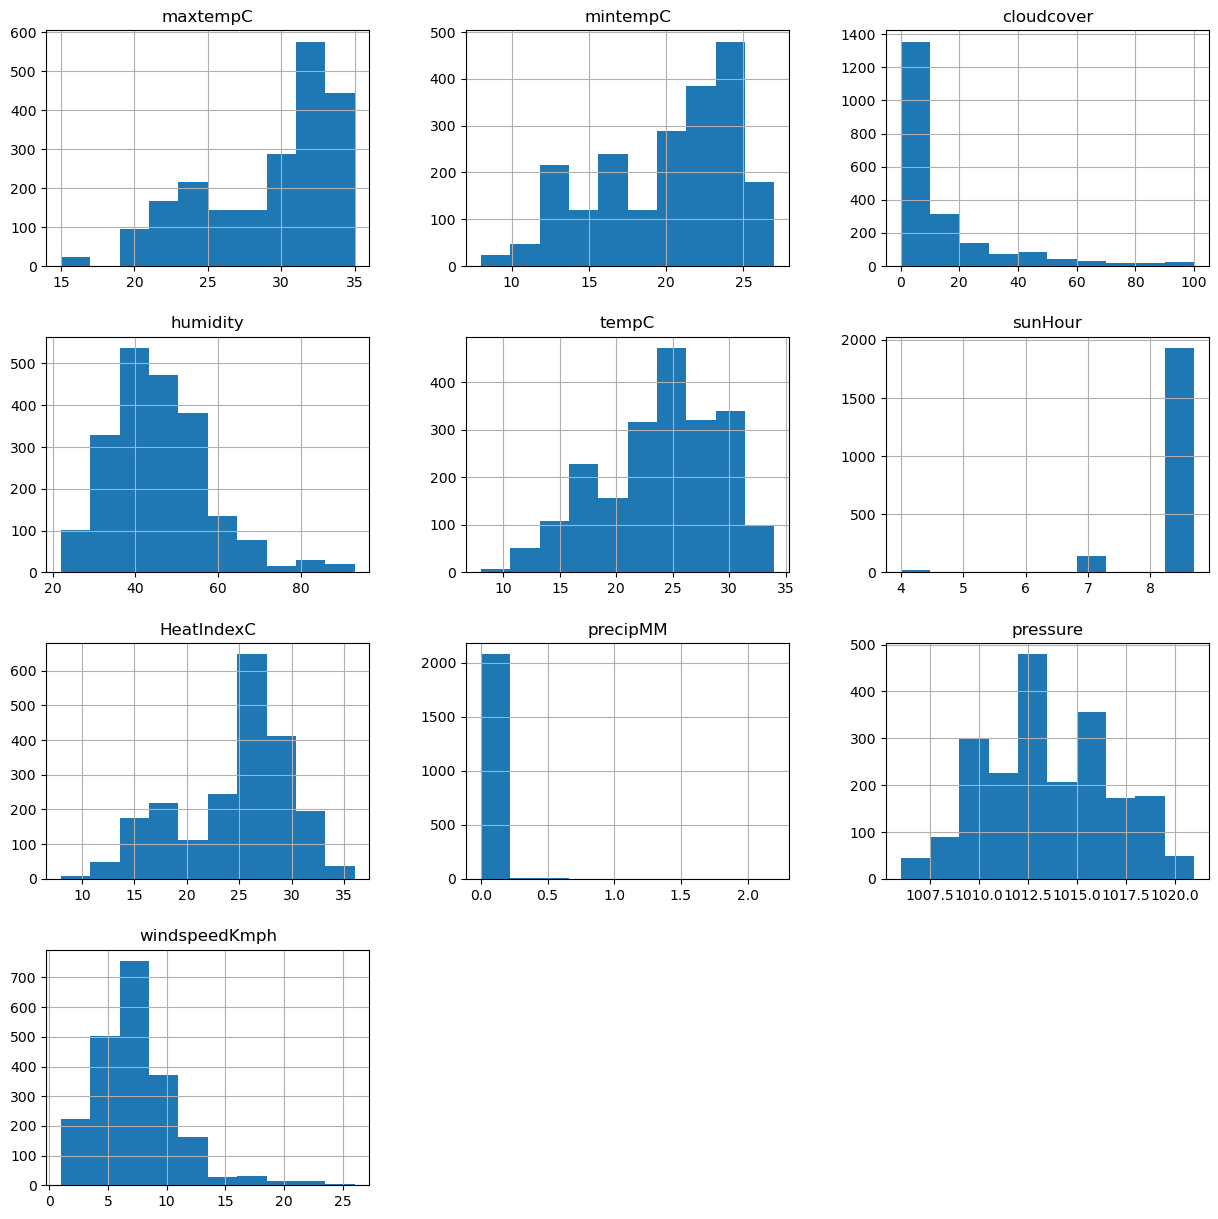

In [23]:
w_df_num.hist(bins=10,figsize=(15,15))

# 

## plotting a subset of the DataFrame

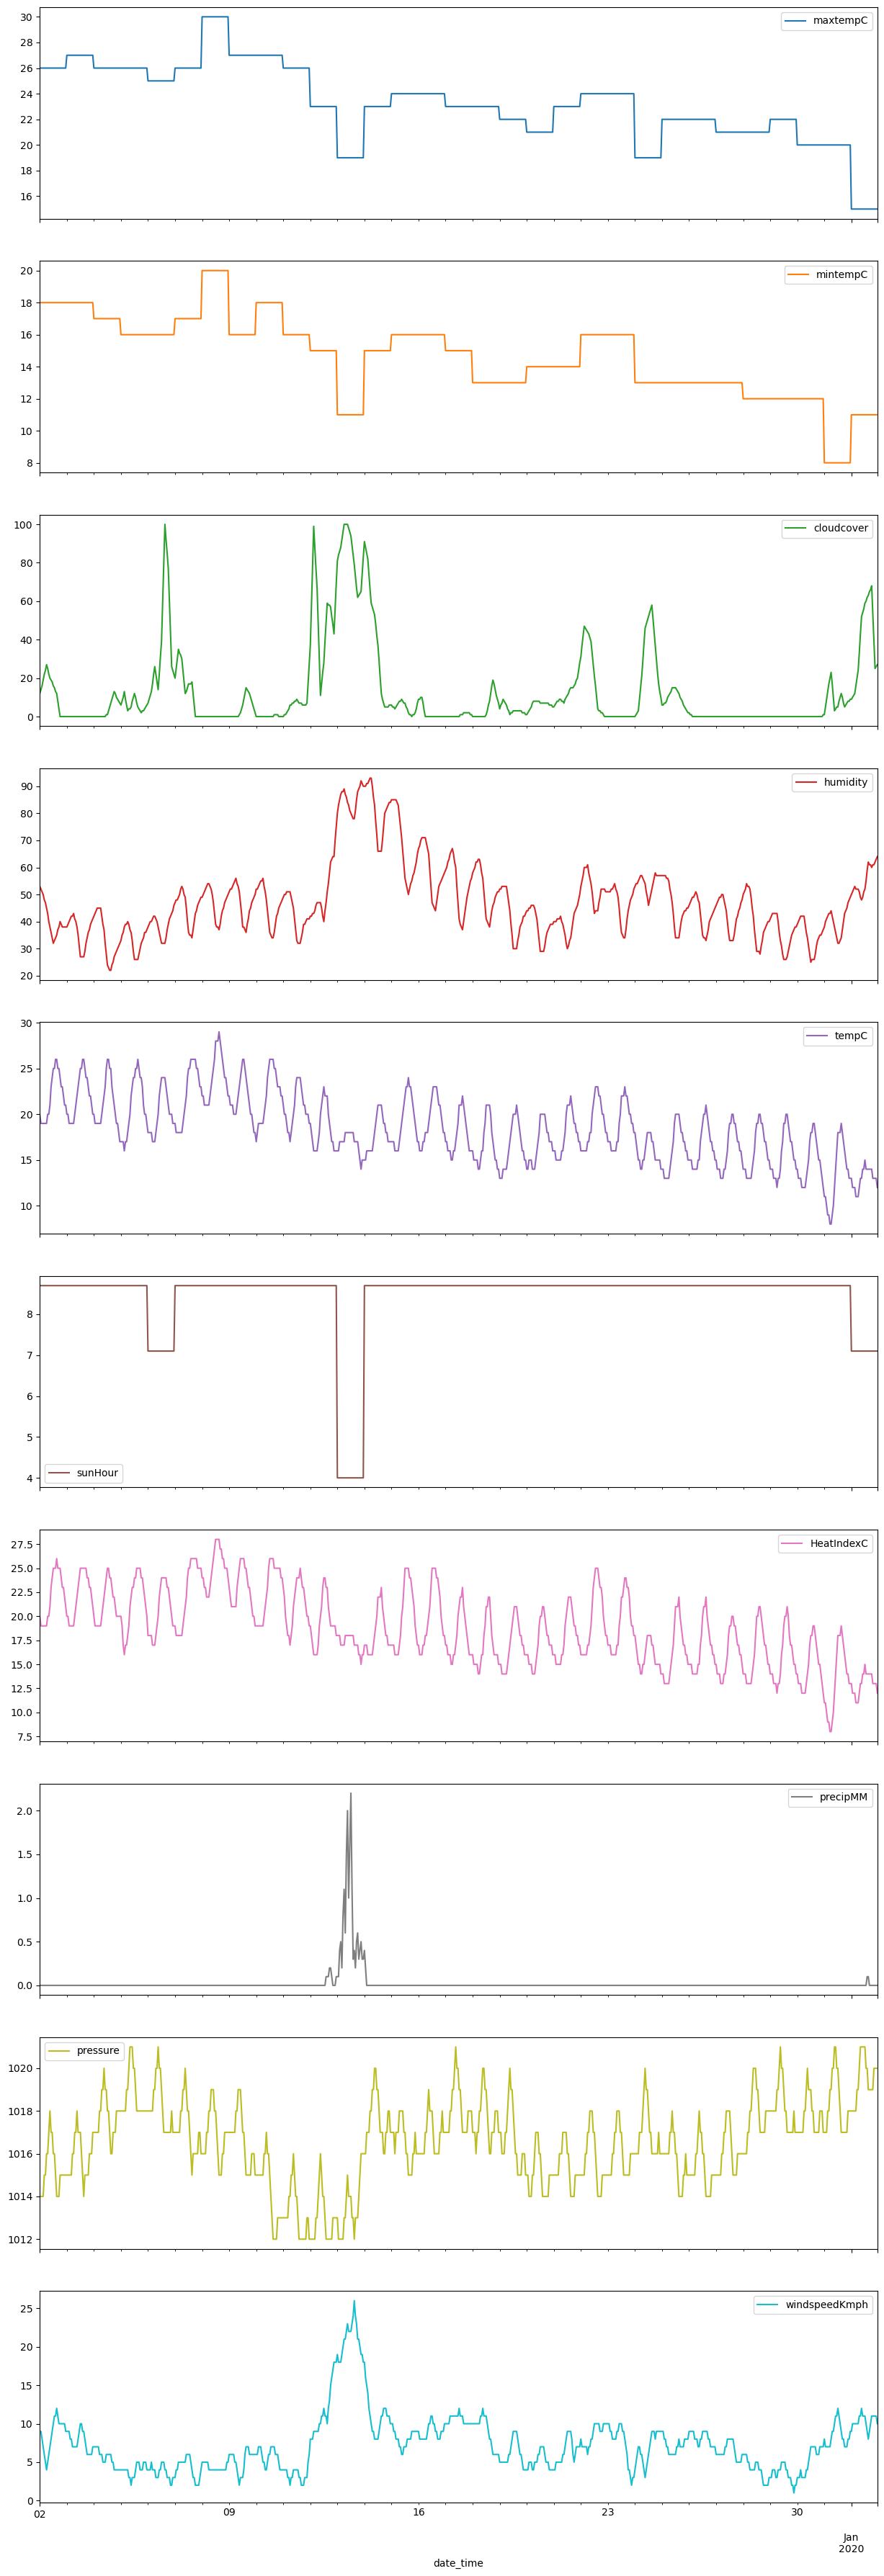

In [24]:
weth=w_df_num['2019-12-02':'2020-01-01'].plot(subplots=True, figsize=(15,45))

#### If  'subplots=True' argument indicates that each numeric column will be plotted separately in its own subplot. 

### Temperature Data 

In [25]:
# Createing a new DataFrame df1 by extracting the 'tempC' 

In [26]:
df1=w_df.reset_index()['tempC']

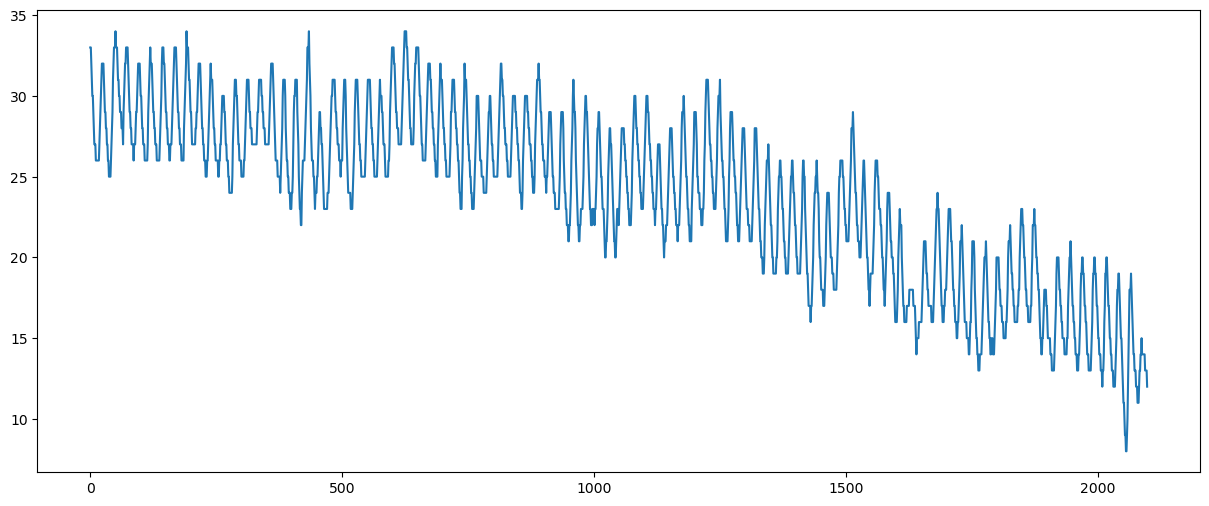

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15,6))
plt.plot(df1)

 The resulting plot will show a line connecting the data points from the 'tempC' column of the df1 DataFrame. The x-axis will correspond to the index of the DataFrame, and the y-axis will represent the temperature values

##  creating a subset of the DataFrame 

In [28]:
weth=w_df_num['2019-10-10':'2019-11-11']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-10-10 00:00:00,33,26,6,60,27,8.7,29,0.0,1008,3
2019-10-10 01:00:00,33,26,6,61,27,8.7,28,0.0,1008,3
2019-10-10 02:00:00,33,26,6,62,27,8.7,28,0.0,1008,3
2019-10-10 03:00:00,33,26,6,63,26,8.7,28,0.0,1008,3
2019-10-10 04:00:00,33,26,5,63,27,8.7,28,0.0,1008,4


In [29]:
weth.tail(5)

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-11-11 19:00:00,31,22,0,45,28,8.7,29,0.0,1010,8
2019-11-11 20:00:00,31,22,0,46,28,8.7,28,0.0,1011,8
2019-11-11 21:00:00,31,22,0,47,27,8.7,28,0.0,1011,8
2019-11-11 22:00:00,31,22,0,49,27,8.7,27,0.0,1011,7
2019-11-11 23:00:00,31,22,0,50,27,8.7,27,0.0,1011,7


In [30]:
w_y=w_df_num.pop("tempC")
w_x=w_df_num

# 

### Now our dataset is prepared and it is ready to be fed to the model for training.
* it’s time to split the dataset into training and testing.

In [31]:
train_X,test_X,train_y,test_y=train_test_split(w_x,w_y,test_size=0.2,random_state=4)

In [32]:
train_X.shape

(1679, 9)

In [33]:
train_y.shape

(1679,)

*  train_x has all the features except temperature and train_y has the corresponding temperature for those features. 
* In supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [34]:
train_y.head()

date_time
2019-11-07 06:00:00    23
2019-12-15 14:00:00    23
2019-12-16 14:00:00    23
2019-11-05 21:00:00    27
2019-10-21 00:00:00    27
Name: tempC, dtype: int64

## Multiple Linear Regression

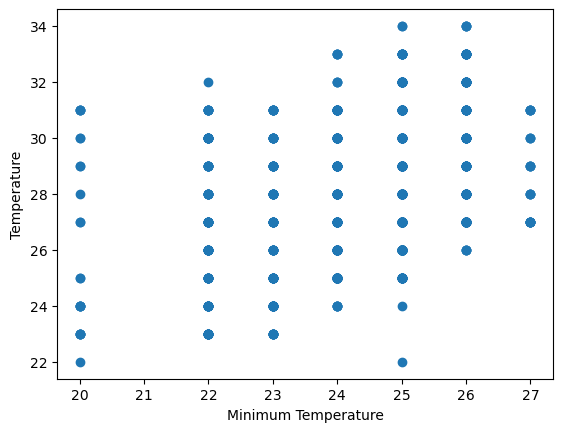

In [35]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

* This type of plot can help you visualize the relationship and correlation between the minimum temperature and the overall temperature within the specified date range.
*  Each point on the scatter plot represents a data entry with its corresponding minimum temperature and temperature values.

# 

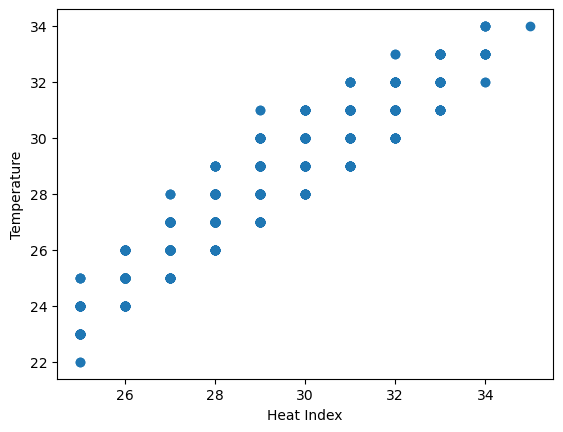

In [36]:
plt.scatter(weth.HeatIndexC, weth.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

* This type of plot can help you observe the correlation or relationship between the heat index and the overall temperature within the specified date range.
* Each point on the scatter plot represents a data entry with its corresponding heat index and temperature values.
* This plot can provide insights into how heat index and temperature relate to each other during the specified time period.

# 

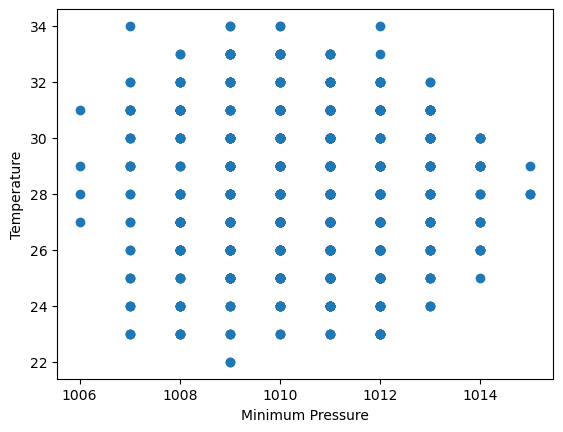

In [37]:
plt.scatter(weth.pressure, weth.tempC)
plt.xlabel("Minimum Pressure")
plt.ylabel("Temperature")
plt.show()

* This scatter plot would then visualize the relationship between pressure and temperature within the specified date range. 
* Each point on the plot corresponds to a data entry with its pressure and temperature values, providing insights into potential correlations or patterns between these two variables..

# 

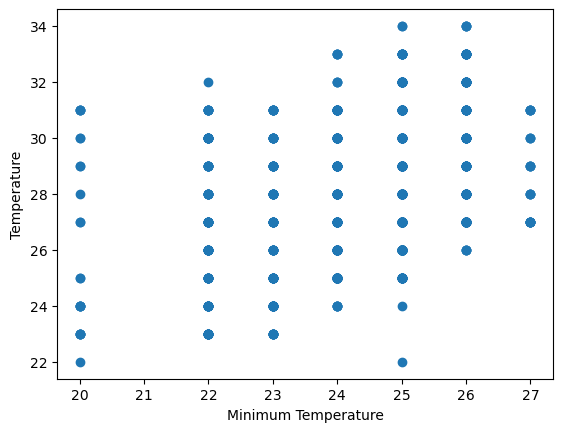

In [38]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

* This code generates a scatter plot with the x-axis representing the "Minimum Temperature" (mintempC column) and the y-axis representing the "Temperature" 

## Building the LinearRegression model 

In [39]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [40]:
prediction = model.predict(test_X)

In [41]:
#calculating error
np.mean(np.absolute(prediction-test_y))

0.6062684781744483

In [42]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.98


In [43]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date_time,,,
2019-11-19 14:00:00,28,27.12,0.88
2019-12-31 22:00:00,13,12.70,0.30
2019-11-28 01:00:00,23,23.53,-0.53
2019-12-29 23:00:00,14,14.05,-0.05
2019-12-31 06:00:00,8,8.37,-0.37
...,...,...,...
2019-12-01 12:00:00,26,25.78,0.22
2019-11-05 10:00:00,29,29.00,0.00
2019-10-18 06:00:00,24,24.28,-0.28


* This DataFrame provides a side-by-side comparison of the actual values, the model's predictions, and the difference between them.
* It can be useful to assess how closely the model's predictions align with the actual values and to identify where the model might be underestimating or overestimating the target variable.

## Decision Tree Regression 

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [45]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.3880952380952381

In [46]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.98


In [47]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
date_time,,,
2019-11-19 14:00:00,28,28.0,0.0
2019-12-31 22:00:00,13,13.0,0.0
2019-11-28 01:00:00,23,23.0,0.0
2019-12-29 23:00:00,14,14.0,0.0
2019-12-31 06:00:00,8,8.0,0.0
...,...,...,...
2019-12-01 12:00:00,26,25.0,1.0
2019-11-05 10:00:00,29,29.0,0.0
2019-10-18 06:00:00,24,24.0,0.0


* This code allows to compare the predictions made by a different approach or model (prediction2) with the actual values and assess the differences between the two sets of predictions.
* It's a useful way to understand the performance of different models and their predictions on the test dataset.

# 

# Random Forest Regression


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [50]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.36025041572184435

In [51]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.99


In [52]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2019-11-19 14:00:00,28,27.96,0.04
2019-12-31 22:00:00,13,13.00,0.00
2019-11-28 01:00:00,23,22.30,0.70
2019-12-29 23:00:00,14,14.00,0.00
2019-12-31 06:00:00,8,8.41,-0.41
...,...,...,...
2019-12-01 12:00:00,26,25.88,0.12
2019-11-05 10:00:00,29,29.47,-0.47
2019-10-18 06:00:00,24,24.00,0.00


* This approach of comparing actual values with predictions and calculating the differences can help to analyze and compare the performance of multiple models or methods on the test dataset. It allows to see how the each set of predictions matches the actual data.

# 

## Calculating score for Multiple Linear Regression

In [53]:
from sklearn.metrics import r2_score

In [54]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.61
Residual sum of squares (MSE): 0.66
R2-score: 0.98


* calculates the mean absolute error (MAE) between the predictions and the actual target values. 
*  calculates the mean squared error (MSE), which is the average of the squared differences between the predictions and the actual values. 
* Lower MAE and MSE values and higher R-squared values generally indicate better model performance.

## Calculating score for Decision Tree Regression

In [55]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.39
Residual sum of squares (MSE): 0.46
R2-score: 0.98


## Calculating score for Random Forest Regression


In [56]:
from sklearn.metrics import r2_score

In [57]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.36
Residual sum of squares (MSE): 0.28
R2-score: 0.99


In [58]:
w_df.tail(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 19:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,13,21,53,61,0.0,1019,13,8,74,11
2020-01-01 20:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,22,39,61,0.0,1020,13,9,81,11
2020-01-01 21:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,23,25,62,0.0,1020,13,10,88,11
2020-01-01 22:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,21,26,63,0.0,1020,13,10,85,11
2020-01-01 23:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,12,20,27,64,0.0,1020,12,10,83,10


In [59]:
w_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2019-10-06 13:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,33,11,6,45,0.0,1008,33,10,281,9
2019-10-06 14:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,33,12,7,46,0.0,1008,33,10,282,9
2019-10-06 15:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,32,13,9,46,0.0,1007,32,10,283,10
2019-10-06 16:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,31,14,11,49,0.0,1007,31,10,282,9
2019-10-06 17:00:00,34,27,0.0,8.7,8,8,48,01:25 PM,No moonset,06:03 AM,...,30,14,13,53,0.0,1007,30,10,280,9


In [60]:
w_df.count()

maxtempC             2099
mintempC             2099
totalSnow_cm         2099
sunHour              2099
uvIndex              2099
uvIndex.1            2099
moon_illumination    2099
moonrise             2099
moonset              2099
sunrise              2099
sunset               2099
DewPointC            2099
FeelsLikeC           2099
HeatIndexC           2099
WindChillC           2099
WindGustKmph         2099
cloudcover           2099
humidity             2099
precipMM             2099
pressure             2099
tempC                2099
visibility           2099
winddirDegree        2099
windspeedKmph        2099
dtype: int64

####  This operation provides information about how much data is available in each column, which can be useful for data quality assessment and analysis. 

# 

### index,axes,colums are use to calculates the total number of rows or entries in the DataFrame

In [61]:
len(w_df.index)

2099

In [62]:
len(w_df.axes[0])

2099

In [63]:
w_df[w_df.columns[0]].count()

2099

### Ploting the line graph 

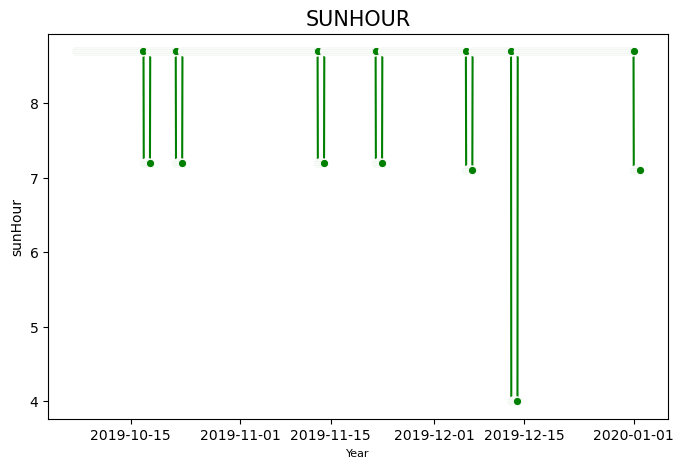

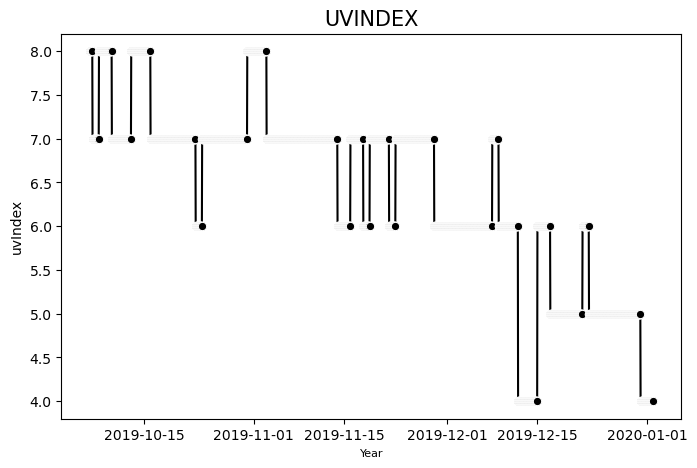

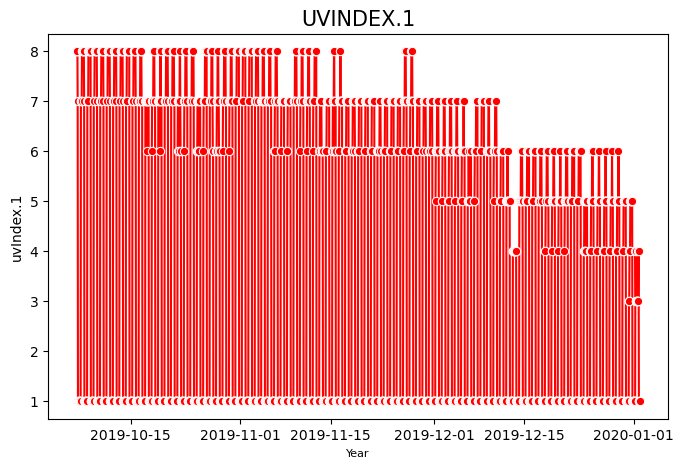

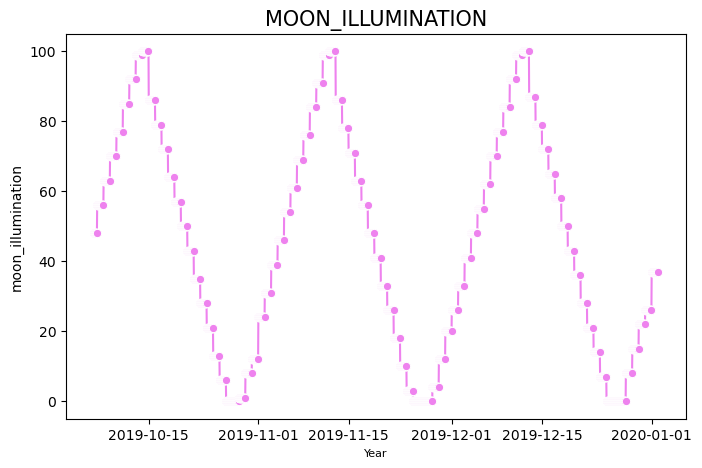

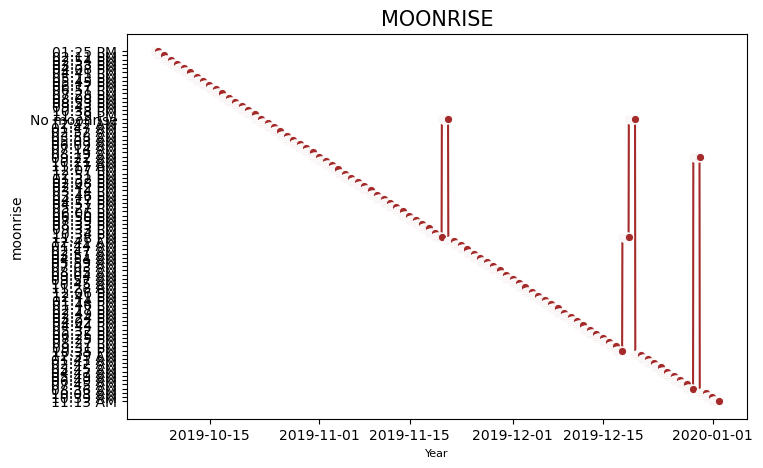

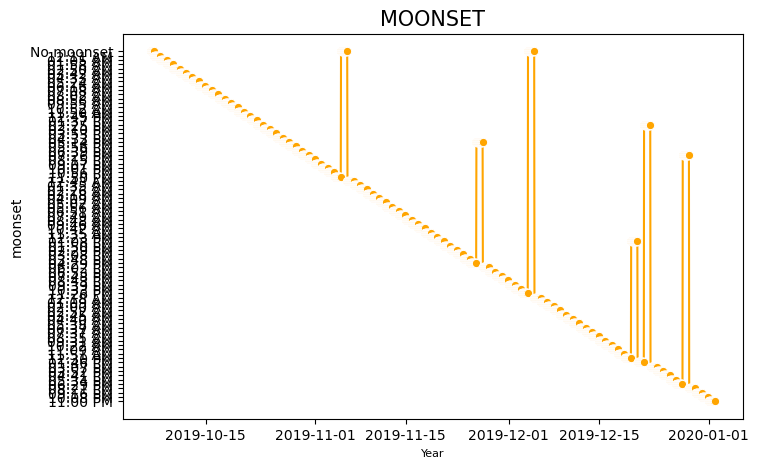

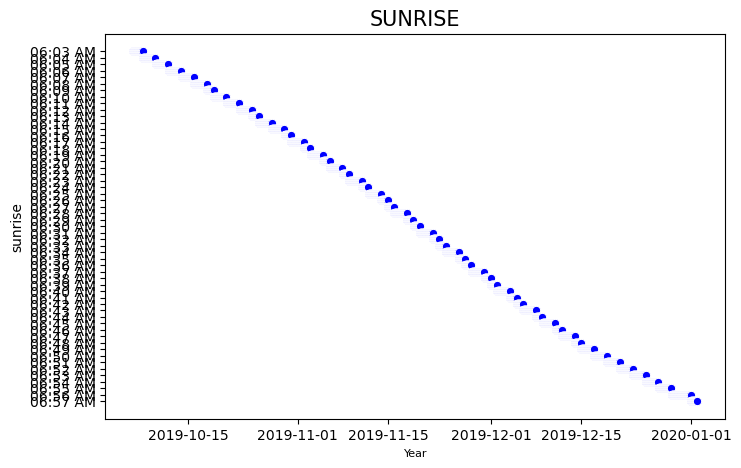

In [64]:
import seaborn as sns # 
import matplotlib.pyplot as plt
%matplotlib inline

color={3:'green',
       4:'black',
       5:'red',
       6:'violet',
       7:'brown',
       8:'orange',
       9:'blue'}
for index in range(3,10):
    plt.figure(figsize=(8,5))
    plt.xlabel('Year', fontsize=8)
    plt.title('{}'.format(w_df.columns[index].upper()), fontsize=15)
    sns.lineplot(data=w_df.iloc[:,index], color=color[index], marker='o')
    plt.show()

###   Computing the correlation matrix for the DataFrame 

In [65]:
w_df.corr()

C:\Users\Vinod\AppData\Local\Temp\ipykernel_3872\2830824249.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  w_df.corr()


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
maxtempC,1.000000,0.953213,NaN,0.257286,0.921845,0.190537,0.153109,0.736481,0.886706,0.886684,0.870406,-0.207914,-0.125944,-0.112505,-0.183520,-0.762346,0.869063,0.228102,0.022486,-0.199020
mintempC,0.953213,1.000000,NaN,0.183138,0.913640,0.185723,0.187725,0.805441,0.892639,0.891345,0.868860,-0.152443,-0.072986,-0.010673,-0.169677,-0.773051,0.868443,0.175747,-0.005685,-0.145813
totalSnow_cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sunHour,0.257286,0.183138,NaN,1.000000,0.241575,0.062377,-0.141095,0.002068,0.161679,0.160811,0.155450,-0.401757,-0.519947,-0.255985,-0.598918,-0.073082,0.152910,0.276523,0.173152,-0.336559
uvIndex,0.921845,0.913640,NaN,0.241575,1.000000,0.178267,0.119294,0.691273,0.843070,0.841063,0.823305,-0.231875,-0.214233,-0.118724,-0.210474,-0.682613,0.822136,0.249877,0.051788,-0.207893
uvIndex.1,0.190537,0.185723,NaN,0.062377,0.178267,1.000000,0.035041,0.140550,0.441806,0.436874,0.484995,-0.092302,-0.035085,-0.355964,-0.023182,-0.070296,0.486784,0.030239,0.092306,0.135930
moon_illumination,0.153109,0.187725,NaN,-0.141095,0.119294,0.035041,1.000000,0.275203,0.187952,0.192864,0.181409,0.007866,0.097256,0.158433,0.114310,-0.177751,0.181377,-0.060105,-0.076933,0.025842
DewPointC,0.736481,0.805441,NaN,0.002068,0.691273,0.140550,0.275203,1.000000,0.762593,0.766905,0.710117,0.039609,0.036665,0.469079,0.061233,-0.666800,0.710299,-0.001722,-0.070738,0.049000
FeelsLikeC,0.886706,0.892639,NaN,0.161679,0.843070,0.441806,0.187952,0.762593,1.000000,0.995841,0.987834,-0.172536,-0.089528,-0.191506,-0.116761,-0.729229,0.987314,0.174942,0.031836,-0.079693
HeatIndexC,0.886684,0.891345,NaN,0.160811,0.841063,0.436874,0.192864,0.766905,0.995841,1.000000,0.984729,-0.162964,-0.086681,-0.188133,-0.117921,-0.728002,0.984863,0.176156,0.037314,-0.072359


 * The correlation matrix shows the pairwise correlations between all pairs of numeric columns in the DataFrame. 
 *  correlation matrix is used to gain insights into how different numeric variables within the dataset are related to each other.

###  Createing a heatmap of the correlation matrix using the seaborn library. 

C:\Users\Vinod\AppData\Local\Temp\ipykernel_3872\788189687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data =w_df.corr(), annot = True, cmap = 'Blues')


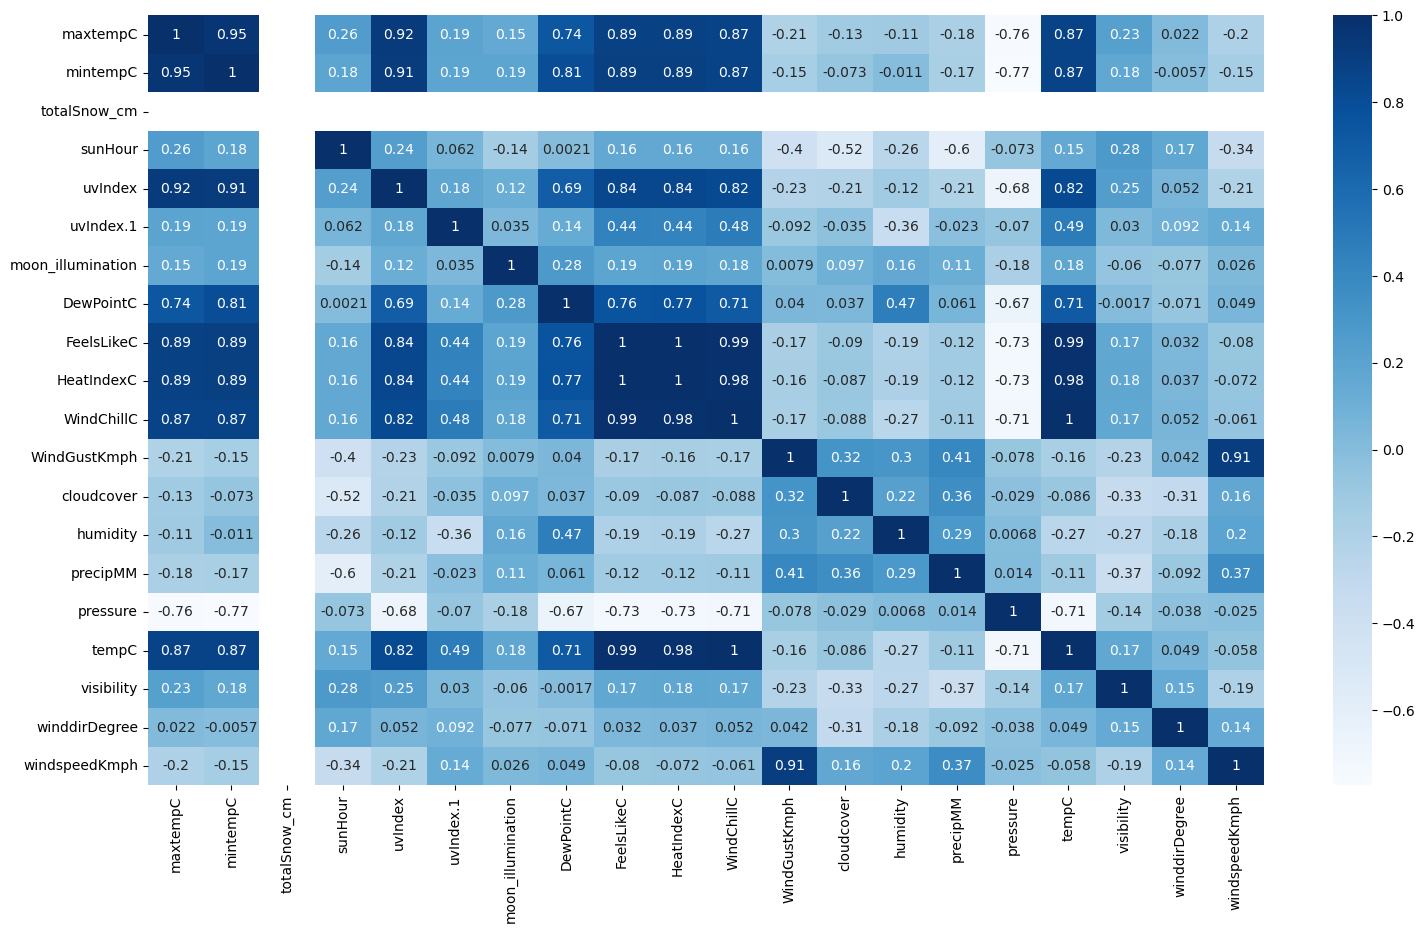

In [66]:
plt.figure(figsize=(18,10))
sns.heatmap(data =w_df.corr(), annot = True, cmap = 'Blues')
plt.show()

* The resulting heatmap visually depicts the strength and direction of correlations between different pairs of numeric columns.
* The color intensity represents the magnitude of the correlation, with darker shades indicating stronger correlations (positive or negative), and lighter shades indicating weaker correlations or no correlation

### Scatter plot for temperature and humidity by summary

###  Creating a new DataFrame ex_data by selecting specific columns from the original DataFrame w_df.  

In [67]:
indices = ['tempC', 'humidity', 'precipMM', 'pressure']
ex_data = w_df.loc[:,indices]
ex_data

,tempC,humidity,precipMM,pressure
date_time,,,,
2019-10-06 13:00:00,33,45,0.0,1008
2019-10-06 14:00:00,33,46,0.0,1008
2019-10-06 15:00:00,32,46,0.0,1007
2019-10-06 16:00:00,31,49,0.0,1007
2019-10-06 17:00:00,30,53,0.0,1007
...,...,...,...,...
2020-01-01 19:00:00,13,61,0.0,1019
2020-01-01 20:00:00,13,61,0.0,1020
2020-01-01 21:00:00,13,62,0.0,1020


The resulting ex_data DataFrame will include only the columns 'tempC', 'humidity', 'precipMM', and 'pressure' from the original w_df DataFrame. This subset of data can be useful for specific analyses or modeling tasks that focus on these particular variables.

In [68]:
indices = ['tempC', 'humidity', 'precipMM', 'pressure']
ex_data = w_df.loc[:,indices]
ex_data

,tempC,humidity,precipMM,pressure
date_time,,,,
2019-10-06 13:00:00,33,45,0.0,1008
2019-10-06 14:00:00,33,46,0.0,1008
2019-10-06 15:00:00,32,46,0.0,1007
2019-10-06 16:00:00,31,49,0.0,1007
2019-10-06 17:00:00,30,53,0.0,1007
...,...,...,...,...
2020-01-01 19:00:00,13,61,0.0,1019
2020-01-01 20:00:00,13,61,0.0,1020
2020-01-01 21:00:00,13,62,0.0,1020
